# Projet Data Analysis Python
## Karim BAALI - IBO1
### Statlog (Image Segmentation)


# Web-Scrapping

In [2]:
import selenium
from selenium import webdriver
wd = webdriver.Firefox(executable_path="./geckodriver")

In [3]:
base_url = "https://archive.ics.uci.edu/ml/datasets/Statlog+%28Image+Segmentation%29"
wd.get(base_url)

In [4]:
#Après avoir charger la page Web, on cherche l'élément contenant le lien de téléchargement 
xpath = "/html/body/table[2]/tbody/tr/td/table[1]/tbody/tr/td[1]/p[1]/span[2]/a[1]"
link = wd.find_element_by_xpath(xpath)
print(link.get_attribute('href'))

https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/segment/


In [5]:
#Avec le lien précédent, on accède à un index, comportant un lien vers le dataset 
#et un lien vers la datadoc
index_url = link.get_attribute('href')
wd.get(index_url)
xpath = "/html/body/table/tbody/tr[5]/td[2]/a"
dl_link = wd.find_element_by_xpath(xpath)
print(dl_link.get_attribute('href'))

https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/segment/segment.dat


# Data Preparation

In [6]:
import pandas as pd

In [7]:
#On utilise pandas pour charger les données via l'URL trouvée avec le web scrapping
df = pd.read_csv(dl_link.get_attribute('href'), sep='\s+',header=None, encoding="latin1")
df.columns = ['region-centroid-col','region-centroid-row','region-pixel-count','short-line-density-5','short-line-density-2','vedge-mean','vedge-sd', 'hedge-mean','hedge-sd','intensity-mean','rawred-mean','rawblue-mean','rawgreen-mean','exred-mean','exblue-mean','exgreen-mean','value-mean','saturation-mean','hue-mean','classe']

df.dtypes["classe"] = int

df.head(5)

,region-centroid-col,region-centroid-row,region-pixel-count,short-line-density-5,short-line-density-2,vedge-mean,vedge-sd,hedge-mean,hedge-sd,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean,classe
0,218.0,178.0,9,0.111111,0.0,0.833333,0.547722,1.111109,0.544331,59.629630,52.444443,75.222220,51.222220,-21.555555,46.77778,-25.222221,75.222220,0.318996,-2.040554,6
1,113.0,130.0,9,0.000000,0.0,0.277778,0.250924,0.333333,0.365148,0.888889,0.000000,2.555556,0.111111,-2.666667,5.00000,-2.333333,2.555556,1.000000,-2.123254,3
2,202.0,41.0,9,0.000000,0.0,0.944448,0.772202,1.111112,1.025597,123.037040,111.888885,139.777790,117.444440,-33.444443,50.22222,-16.777779,139.777790,0.199347,-2.299918,2
3,32.0,173.0,9,0.000000,0.0,1.722222,1.781593,9.000000,6.749488,43.592594,39.555557,52.888890,38.333336,-12.111111,27.88889,-15.777778,52.888890,0.266914,-1.998858,6
4,61.0,197.0,9,0.000000,0.0,1.444444,1.515353,2.611111,1.925463,49.592594,44.222220,61.555557,43.000000,-16.111110,35.88889,-19.777779,61.555557,0.302925,-2.022274,6


In [8]:
#On remplace les entiers dans la colonne "classe" par l'équivalent correspondant pour plus de compréhension
classes = {1 : "Brickface",
2 : "Sky",
3 : "Foliage",
4 : "Cement",
5 : "Window",
6 : "Path",
7 : "Grass"}

df["classe_str"] = df["classe"] #On duplique avant pour pouvoir utiliser plus facilement ce champ plus tard
df["classe_str"] = df.classe.map(classes) 
df.head(10)

,region-centroid-col,region-centroid-row,region-pixel-count,short-line-density-5,short-line-density-2,vedge-mean,vedge-sd,hedge-mean,hedge-sd,intensity-mean,...,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean,classe,classe_str
0,218.0,178.0,9,0.111111,0.0,0.833333,0.547722,1.111109,0.544331,59.629630,...,75.222220,51.222220,-21.555555,46.777780,-25.222221,75.222220,0.318996,-2.040554,6,Path
1,113.0,130.0,9,0.000000,0.0,0.277778,0.250924,0.333333,0.365148,0.888889,...,2.555556,0.111111,-2.666667,5.000000,-2.333333,2.555556,1.000000,-2.123254,3,Foliage
2,202.0,41.0,9,0.000000,0.0,0.944448,0.772202,1.111112,1.025597,123.037040,...,139.777790,117.444440,-33.444443,50.222220,-16.777779,139.777790,0.199347,-2.299918,2,Sky
3,32.0,173.0,9,0.000000,0.0,1.722222,1.781593,9.000000,6.749488,43.592594,...,52.888890,38.333336,-12.111111,27.888890,-15.777778,52.888890,0.266914,-1.998858,6,Path
4,61.0,197.0,9,0.000000,0.0,1.444444,1.515353,2.611111,1.925463,49.592594,...,61.555557,43.000000,-16.111110,35.888890,-19.777779,61.555557,0.302925,-2.022274,6,Path
5,149.0,185.0,9,0.000000,0.0,1.555555,1.068055,3.055555,1.925463,49.333332,...,59.555557,43.111110,-12.000000,30.666666,-18.666666,59.555557,0.275889,-1.952770,6,Path
6,197.0,229.0,9,0.000000,0.0,1.388888,1.574073,1.166666,0.566666,17.740740,...,17.888890,21.222221,-10.888889,0.444444,10.444445,21.222221,0.335717,2.651605,7,Grass
7,29.0,111.0,9,0.000000,0.0,0.388889,0.240741,0.611111,0.151852,5.407407,...,6.333334,3.000000,4.444445,2.777778,-7.222222,6.888889,0.564153,-0.897859,1,Brickface
8,1.0,81.0,9,0.000000,0.0,12.166667,267.455540,9.222222,205.362960,21.333334,...,30.555555,19.444445,-22.000000,27.666666,-5.666666,30.555555,0.595282,-2.438409,3,Foliage
9,69.0,85.0,9,0.111111,0.0,3.111111,8.207409,3.944444,9.440739,21.444445,...,28.111110,15.777778,-3.000000,20.000000,-17.000000,28.111110,0.437404,-1.659879,1,Brickface


# Data Visualisation

In [9]:
df.shape

(2310, 21)

In [10]:
df.columns

Index(['region-centroid-col', 'region-centroid-row', 'region-pixel-count',
       'short-line-density-5', 'short-line-density-2', 'vedge-mean',
       'vedge-sd', 'hedge-mean', 'hedge-sd', 'intensity-mean', 'rawred-mean',
       'rawblue-mean', 'rawgreen-mean', 'exred-mean', 'exblue-mean',
       'exgreen-mean', 'value-mean', 'saturation-mean', 'hue-mean', 'classe',
       'classe_str'],
      dtype='object')

In [11]:
df.sort_values(["classe","region-centroid-col", "region-centroid-row"])

,region-centroid-col,region-centroid-row,region-pixel-count,short-line-density-5,short-line-density-2,vedge-mean,vedge-sd,hedge-mean,hedge-sd,intensity-mean,...,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean,classe,classe_str
1334,1.0,115.0,9,0.111111,0.000000,1.833333,2.388889,2.222223,4.962960,16.555555,...,21.777779,12.222222,-2.666667,15.666667,-13.000000,21.888890,0.425538,-1.548010,1,Brickface
272,2.0,44.0,9,0.000000,0.000000,2.166667,2.388888,2.388890,1.529629,18.740740,...,25.222221,13.666667,-4.222222,19.444445,-15.222222,25.222221,0.457681,-1.753726,1,Brickface
711,2.0,44.0,9,0.000000,0.000000,2.166667,2.388888,2.388890,1.529629,18.740740,...,25.222221,13.666667,-4.222222,19.444445,-15.222222,25.222221,0.457681,-1.753726,1,Brickface
347,2.0,63.0,9,0.000000,0.000000,1.222222,0.562963,1.500000,0.700001,18.074074,...,23.666666,13.333333,-2.555556,16.777779,-14.222222,23.666666,0.435021,-1.683847,1,Brickface
1976,2.0,89.0,9,0.000000,0.000000,1.222222,1.762962,2.555556,3.496296,18.962963,...,23.888890,14.222222,-0.555556,14.777778,-14.222222,23.888890,0.402507,-1.544214,1,Brickface
1999,2.0,98.0,9,0.000000,0.000000,2.000000,0.666667,1.055555,0.551853,17.481482,...,20.777779,13.333333,2.555556,9.888889,-12.444445,20.777779,0.356724,-1.360437,1,Brickface
463,4.0,40.0,9,0.000000,0.000000,1.333334,2.711112,1.111112,2.118518,17.185184,...,23.333334,12.555555,-4.555555,18.444445,-13.888889,23.333334,0.463060,-1.783602,1,Brickface
2118,4.0,87.0,9,0.111111,0.000000,2.777778,3.096294,2.722222,4.374074,17.333334,...,21.000000,12.777778,2.666667,11.000000,-13.666667,21.111110,0.391731,-1.318373,1,Brickface
926,5.0,92.0,9,0.000000,0.000000,1.333333,0.488889,2.166667,1.277778,18.703703,...,23.777779,13.555555,0.222222,15.222222,-15.444445,23.777779,0.428860,-1.548296,1,Brickface
1566,5.0,101.0,9,0.000000,0.000000,2.333333,2.311111,1.777778,0.607407,16.925926,...,19.888890,12.555555,4.222222,8.888889,-13.111111,20.222221,0.376852,-1.211110,1,Brickface


In [12]:
df.groupby("classe")["value-mean"].mean()

#Selon le type d'image dont est issu le groupe de pixel, on peut remarquer que la valeur moyenne de
#ces pixels est complètement différente. Pour la catégorie "Sky", celle-ci est beaucoup plus élevée, 
#ce qui s'explique par le fait que les couleurs sont beaucoup plus vives.

classe
1     18.747475
2    134.943436
3     12.967340
4     55.413805
5     13.064983
6     60.579462
7     20.245791
Name: value-mean, dtype: float64

In [13]:
df.groupby("classe")["intensity-mean"].mean()
#On observe le même type de différence concernant l'intensité moyenne des groupes de pixels selon  
#la catégorie à laquelle ils appartiennent

classe
1     14.545567
2    118.179125
3      8.404377
4     44.869697
5      8.843771
6     48.974635
7     15.543996
Name: intensity-mean, dtype: float64

In [14]:
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
from bokeh.models import LinearColorMapper
from bokeh.models import ColumnDataSource
output_notebook()

p = figure(title = "Pixels intensity and value by classes")
p.xaxis.axis_label = "Pixel intensity"
p.yaxis.axis_label = "Pixel value"

source = ColumnDataSource(df)

exp_cmap = LinearColorMapper(palette="Viridis256", 
                             low = min(df["classe"]), 
                             high = max(df["classe"]))

p.circle("value-mean", "intensity-mean", source=source, line_color=None,
        fill_color={"field":"classe", "transform":exp_cmap}, legend='classe_str')

p.legend.location = "top_left"

show(p)

Loading BokehJS ...

In [15]:
df.groupby("classe_str").size()

classe_str
Brickface    330
Cement       330
Foliage      330
Grass        330
Path         330
Sky          330
Window       330
dtype: int64

In [16]:
p = figure(title = "Position of the pixels on a x/y axis")


p.xaxis.axis_label = "Region-centroid-col"
p.yaxis.axis_label = "Region-centroid-row"

#Pas réussi à placer l'origine dans le coin haut gauche, j'inverse donc les valeurs sur l'axe Y,
#pour permettre un affichage comme sur une image (le pixel 1.1 est en haut à gauche)
df["region-centroid-row-2plot"] = df["region-centroid-row"] * (-1)


source = ColumnDataSource(df)


exp_cmap = LinearColorMapper(palette="Spectral6", 
                             low = min(df["classe"]), 
                             high = max(df["classe"]))

p.circle("region-centroid-col", "region-centroid-row-2plot", source=source, line_color=None,
        fill_color={"field":"classe", "transform":exp_cmap}, legend='classe_str')

p.legend.location = "top_left"

show(p)



#En effectuant cela, on remarque bien que l'herbe est généralement localisée dans le bas de l'image,
#tandis que le ciel se trouve en haut. Les différents objets sont donc positionnés de façon cohérente
#par rapport à ce que l'on pourrait attendre

# Modélisation

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [18]:
#On sépare la colonne à deviner, ici la classe à laquelle appartient le groupe de pixel, 
# du reste des données qui vont servir à entrainer le modèle

col_y = "classe"
col_y_str = "classe_str"
X = df.drop({col_y, col_y_str}, axis="columns")
Y = df[col_y]

In [19]:
X.head(5)

,region-centroid-col,region-centroid-row,region-pixel-count,short-line-density-5,short-line-density-2,vedge-mean,vedge-sd,hedge-mean,hedge-sd,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean,region-centroid-row-2plot
0,218.0,178.0,9,0.111111,0.0,0.833333,0.547722,1.111109,0.544331,59.629630,52.444443,75.222220,51.222220,-21.555555,46.77778,-25.222221,75.222220,0.318996,-2.040554,-178.0
1,113.0,130.0,9,0.000000,0.0,0.277778,0.250924,0.333333,0.365148,0.888889,0.000000,2.555556,0.111111,-2.666667,5.00000,-2.333333,2.555556,1.000000,-2.123254,-130.0
2,202.0,41.0,9,0.000000,0.0,0.944448,0.772202,1.111112,1.025597,123.037040,111.888885,139.777790,117.444440,-33.444443,50.22222,-16.777779,139.777790,0.199347,-2.299918,-41.0
3,32.0,173.0,9,0.000000,0.0,1.722222,1.781593,9.000000,6.749488,43.592594,39.555557,52.888890,38.333336,-12.111111,27.88889,-15.777778,52.888890,0.266914,-1.998858,-173.0
4,61.0,197.0,9,0.000000,0.0,1.444444,1.515353,2.611111,1.925463,49.592594,44.222220,61.555557,43.000000,-16.111110,35.88889,-19.777779,61.555557,0.302925,-2.022274,-197.0


In [20]:
Y.head()

#Dans Y on retrouve donc les informations que l'on veut prédire, séparés du reste des données qui vont 
#servir à les prédire. Ici, on veut savoir à quelle type d'image appartenait le groupe de pixels à l'orgine


0    6
1    3
2    2
3    6
4    6
Name: classe, dtype: int64

In [21]:
#On commence par séparer le dataset en 2 (70/30), une partie qui va entrainer le modèle et la 2e qui servira
#à tester le modèle créer pour vérifier sa précision à prédire la donnée qui se trouve dans Y
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3 )
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.05)

In [22]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test  = scaler.transform(x_test) 

C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [23]:
x_train.shape, x_validation.shape, y_train.shape, y_validation.shape, x_test.shape, y_test.shape

((1536, 20), (81, 20), (1536,), (81,), (693, 20), (693,))

In [24]:
hyperparameters = {"n_estimators": 30,
                   "n_jobs": -1}

algo = RandomForestRegressor(**hyperparameters)
modele = algo.fit(x_train, y_train)
modele.score(x_test, y_test)

0.977098195945622

In [25]:
#On peut également tester un second algo pour comparer le score, on remarquera ici un score bien inférieur 
#à l'algo précédent (0.69 contre 0.97)
from sklearn import svm

svr = svm.SVR(kernel='linear')
modele2 = svr.fit(x_train, y_train)
modele2.score(x_test, y_test)

0.641662280278996

In [26]:
#On a vu ci dessus que l'on pouvait définir des hyperparamètres, qui vont venir modifier
#certaines caractéristiques de l'algorithme utilisé, en les changeant à la main, un peu aléatoirement,
#on peut observer une amélioration ou réduction du score de prédiction du modèle généré, mais cela prendrais
#énormément de temps et ne serait pas optimal

svr.get_params()

#On va donc utiliser un GRID SEARCH pour effectuer toutes ses variations, et ainsi trouver
#les combinaisons les plus avantageuses (offrant le meilleur score)

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'auto_deprecated',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [27]:
from sklearn.model_selection import GridSearchCV

parameters = {  'gamma' : [0.01, 0.1, 0.5]           }
grid       = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(x_train, y_train)
print (grid.best_score_, grid.best_estimator_) 

#Ici, on obtient un best score de 0.92, très largement supérieur à celui trouver en utilisant 
#les hyperparametres par défaut de l'algo SVR, en faisant varier uniquement le paramètre gamma

C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.915108389279923 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.5,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [28]:
#Il est possible de faire varier d'autres hyperparametres pour tenter d'améliorer ce score
parameters = {  'C'      : [1.5, 2, 2.5]   ,
                'kernel' : ['rbf', 'poly', 'sigmoid'],
                'gamma'  : [ 0.05, 0.10, 0.15] }
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(x_train, y_train)
print (grid.best_score_, grid.best_estimator_)


C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.9297605184531553 SVR(C=2.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [29]:
parameters = {  'C'       : [4, 5, 6, 7]   ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.03, 0.05, 0.07],
                 "degree" : [1,2, 3]}
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(x_train, y_train)
print (grid.best_score_, grid.best_estimator_)

C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.9316770260468088 SVR(C=7, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma=0.07,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


## Maintenant que nous avons testé 2 algorithmes différents en jouant sur les hyperparamètres, il est intéressant de trouver l'algorithme qui convient le mieux


In [30]:
def get_sklearn_algorithms(verbose = False):
    """
    Explore all submodule of sklearn and fetch functions having a 'fit' attribute.
    
    Be careful : some functions are not models (ex : crossvalidators)
    Parameters :
        debug = print or not stuff on console
    Return :
        dict : { module : [ fit_functions] }
    """
    from collections import defaultdict
    import importlib
    import sklearn
    algos = defaultdict(list)
    if verbose : print (dir(sklearn))
    for nom_module in dir(sklearn):    
        if verbose : print (nom_module)
        try:
            to_import = "sklearn.%s"%nom_module
            module    = importlib.import_module(to_import)
            for nom_fonction in dir(module):
                fonction = getattr(module, nom_fonction)
                if hasattr(fonction, "fit"):
                    if verbose : print (" nom algorithme  = ", nom_fonction)
                    algos[nom_module].append(fonction)                                            
        except Exception as e:
            if verbose : print (e)
        if verbose: print ("="*30)
    return algos

In [31]:
algos = get_sklearn_algorithms()
for key in algos.keys():
    print ("\n===>",key)
    algos_ = []
    for algo in algos[key]:
        classe_algo = str(algo)
        nom_algo    = classe_algo[str(classe_algo).rfind(".")+1:str(classe_algo).rfind("'")]
        algos_.append(nom_algo)
    print (",".join(algos_))


===> ensemble
AdaBoostClassifier,AdaBoostRegressor,BaggingClassifier,BaggingRegressor,ExtraTreesClassifier,ExtraTreesRegressor,GradientBoostingClassifier,GradientBoostingRegressor,IsolationForest,RandomForestClassifier,RandomForestRegressor,RandomTreesEmbedding,VotingClassifier

===> feature_selection
GenericUnivariateSelect,RFE,RFECV,SelectFdr,SelectFpr,SelectFromModel,SelectFwe,SelectKBest,SelectPercentile,VarianceThreshold

===> linear_model
ARDRegression,BayesianRidge,ElasticNet,ElasticNetCV,HuberRegressor,Lars,LarsCV,Lasso,LassoCV,LassoLars,LassoLarsCV,LassoLarsIC,LinearRegression,LogisticRegression,LogisticRegressionCV,MultiTaskElasticNet,MultiTaskElasticNetCV,MultiTaskLasso,MultiTaskLassoCV,OrthogonalMatchingPursuit,OrthogonalMatchingPursuitCV,PassiveAggressiveClassifier,PassiveAggressiveRegressor,Perceptron,RANSACRegressor,RandomizedLasso,RandomizedLogisticRegression,Ridge,RidgeCV,RidgeClassifier,RidgeClassifierCV,SGDClassifier,SGDRegressor,TheilSenRegressor

===> model_select

In [32]:
performances               = {}
modeles_a_tester           = []
classes_de_models_a_tester = algos.keys()
best_algorithm = 0
best_perf = 0
for classe_de_models in classes_de_models_a_tester:
    modeles_a_tester.extend(algos[classe_de_models])
    
for pointeur_vers_algo in modeles_a_tester:
    try:
        algorithme = pointeur_vers_algo()
        doc        = algorithme.__doc__
        name       = doc[:min(doc.find(":"), 25)].strip()
        print (name)
        algorithme.fit(x_train, y_train)
        performance = algorithme.score(x_test, y_test)
        print (performance)
        if performance >  best_perf:
            best_algorithm = algorithme
            best_perf = performance
            
        if 0<performance and performance<1:
            performances[name] = [performance]
    except Exception as e:
        if "label" in str(e): print ("Algo de classification")
        else                : print (str(e)[:50])
    print ("="*30)
    

An AdaBoost classifier.
0.4083694083694084
An AdaBoost regressor.
0.9007271423446969
A Bagging classifier.
0.9567099567099567
A Bagging regressor.
0.9794425699277002
An extra-trees classifier
0.9711399711399712
An extra-trees regressor.
0.9858265732559521
Gradient Boosting for cla


C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9725829725829725
Gradient Boosting for reg
0.9592172486892019
Isolation Forest Algorith


C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\ensemble\iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


'IsolationForest' object has no attribute 'score'
A random forest classifie
0.9696969696969697
A random forest regressor
0.9699370165849549
An ensemble of totally ra
'RandomTreesEmbedding' object has no attribute 'sc
__init__() missing 1 required positional argument:
Univariate feature select
'GenericUnivariateSelect' object has no attribute 
__init__() missing 1 required positional argument:
__init__() missing 1 required positional argument:
Filter
'SelectFdr' object has no attribute 'score'
Filter
'SelectFpr' object has no attribute 'score'
__init__() missing 1 required positional argument:
Filter
'SelectFwe' object has no attribute 'score'
Select features according
'SelectKBest' object has no attribute 'score'
Select features according
'SelectPercentile' object has no attribute 'score'
Feature selector that rem
'VarianceThreshold' object has no attribute 'score
Bayesian ARD regression.


C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [2] are constant.
  UserWarning)
C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [2] are constant.
  UserWarning)
C:\Users\krim7\Anacon

0.667182136179023
Bayesian ridge regression
0.6580487390306746
Linear regression with co
0.4145024042651305
Elastic Net model with it
0.6596261114206603
Linear regression model t
0.6537916163533469
Least Angle Regression mo
0.49912512208250837
Cross-validated Least Ang
0.6335488714270051
Linear Model trained with
0.28392599655025474
Lasso linear model with i
0.6607681884731009

C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 15 iterations, i.e. alpha=5.552e-04, with an active set of 12 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 17 iterations, i.e. alpha=4.857e-04, with an active set of 13 regressors, and the smallest cholesky pivot element being 5.576e-08. Reduce max_iter or increase eps p


Lasso model fit with Leas
-0.00017982625234114202
Cross-validated Lasso, us
0.6617098959870851
Lasso model fit with Lars
0.6617098959870851
Ordinary least squar
0.661979857404652
Logistic Regression (aka
0.9047619047619048
Logistic Regression CV (a


C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 8 iterations, i.e. alpha=3.557e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 10 iterations, i.e. alpha=1.470e-03, with an active set of 8 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps para

C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1

0.9206349206349206
Multi-task ElasticNet mod
For mono-task outputs, use ElasticNet
Multi-task L1/L2 ElasticN
For mono-task outputs, use ElasticNetCV
Multi-task Lasso model tr
For mono-task outputs, use ElasticNet
Multi-task Lasso model tr
For mono-task outputs, use LassoCV
Orthogonal Matching Pursu
0.5551190506092769
Cross-validated Orthogona
0.6219722189570616
Passive Aggressive Classi
0.8787878787878788
Passive Aggressive Regres
0.14533513395720699
Perceptron

    Read more
0.8124098124098124
RANSAC (RANdom SAmple Con
-0.2253048456452975
Randomized Lasso.

    Ra
'RandomizedLasso' object has no attribute 'score'
Randomized Logistic Regre
'RandomizedLogisticRegression' object has no attri
Linear least squares with
0.6597420360611693
Ridge regression with bui
0.6623243054634016
Classifier using Ridge re
0.823953823953824
Ridge classifier with bui
0.8311688311688312
Linear classifiers (SVM,
0.886002886002886
Linear model fitted by mi
0.6567623382378638
Theil-Sen Estimator


C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


-48184.43141969838
__init__() missing 2 required positional arguments
__init__() missing 2 required positional arguments
Classifier implementing t
0.9451659451659452
Regression based on k-nea
0.9582637201765892
Kernel Density Estimation
-16266.409710173462
Performs approximate near
'LSHForest' object has no attribute 'score'
Unsupervised Outlier Dete
'LocalOutlierFactor' object has no attribute 'scor
Nearest centroid classifi
0.8571428571428571
Unsupervised learner for
'NearestNeighbors' object has no attribute 'score'
Classifier implementing a
Algo de classification
Regression based on neigh


C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (20 < 32).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (20 < 32).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (20 < 32).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\random_projection.py:379: DataDimensionalityWarning: 

-1.967052643321999e+36
Binarize data (set featur
'Binarizer' object has no attribute 'score'
Constructs a transformer
'FunctionTransformer' object has no attribute 'sco
Imputation transformer fo
'Imputer' object has no attribute 'score'
Bin continuous data into
'KBinsDiscretizer' object has no attribute 'score'
Center a kernel matrix
'KernelCenterer' object has no attribute 'score'
Binarize labels in a one-
fit() takes 2 positional arguments but 3 were give
Encode labels with value
fit() takes 2 positional arguments but 3 were give
Scale each feature by its
'MaxAbsScaler' object has no attribute 'score'
Transforms features by sc
'MinMaxScaler' object has no attribute 'score'
Transform between iterabl
fit() takes 2 positional arguments but 3 were give
Normalize samples individ
'Normalizer' object has no attribute 'score'
Encode categorical intege
OneHotEncoder in legacy mode cannot handle categor
Encode categorical featur
'OrdinalEncoder' object has no attribute 'score'
Generate polynom

C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\preprocessing\_discretization.py:161: UserWarning: Feature 2 is constant and will be replaced with 0.
  "replaced with 0." % jj)
C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, Futu

0.9090909090909091
Linear Support Vector Reg
0.6410428401512325
Nu-Support Vector Classif
0.922077922077922
Nu Support Vector Regress
0.908015454603826
Unsupervised Outlier Dete


C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


'OneClassSVM' object has no attribute 'score'
C-Support Vector Classifi
0.9408369408369408
Epsilon-Support Vector Re
0.9076168668786491
'module' object is not callable
A decision tree classifie
0.9552669552669553

C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\krim7\Anaconda2\envs\tp\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



A decision tree regressor
0.9653161109500741
An extremely randomized t
0.9321789321789322
An extremely randomized t
0.9696515970813149


In [33]:
best_algorithm, best_perf

(ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
 0.9858265732559521)

In [34]:
performances

{'An AdaBoost classifier.': [0.4083694083694084],
 'An AdaBoost regressor.': [0.9007271423446969],
 'A Bagging classifier.': [0.9567099567099567],
 'A Bagging regressor.': [0.9794425699277002],
 'An extra-trees classifier': [0.9711399711399712],
 'An extra-trees regressor.': [0.9858265732559521],
 'Gradient Boosting for cla': [0.9725829725829725],
 'Gradient Boosting for reg': [0.9592172486892019],
 'A random forest classifie': [0.9696969696969697],
 'A random forest regressor': [0.9699370165849549],
 'Bayesian ARD regression.': [0.667182136179023],
 'Bayesian ridge regression': [0.6580487390306746],
 'Linear regression with co': [0.4145024042651305],
 'Elastic Net model with it': [0.6596261114206603],
 'Linear regression model t': [0.6537916163533469],
 'Least Angle Regression mo': [0.49912512208250837],
 'Cross-validated Least Ang': [0.6335488714270051],
 'Linear Model trained with': [0.28392599655025474],
 'Lasso linear model with i': [0.6607681884731009],
 'Cross-validated Lasso, u

In [35]:
df_perf = pd.DataFrame(performances).T
col_name = "performance"
df_perf.columns = [col_name]

In [36]:
df_perf = df_perf.sort_values(col_name)
df_perf

,performance
Passive Aggressive Regres,0.145335
Linear Model trained with,0.283926
An AdaBoost classifier.,0.408369
Linear regression with co,0.414502
Least Angle Regression mo,0.499125
Orthogonal Matching Pursu,0.555119
Cross-validated Orthogona,0.621972
Cross-validated Least Ang,0.633549
Linear Support Vector Reg,0.641043
Linear regression model t,0.653792


In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

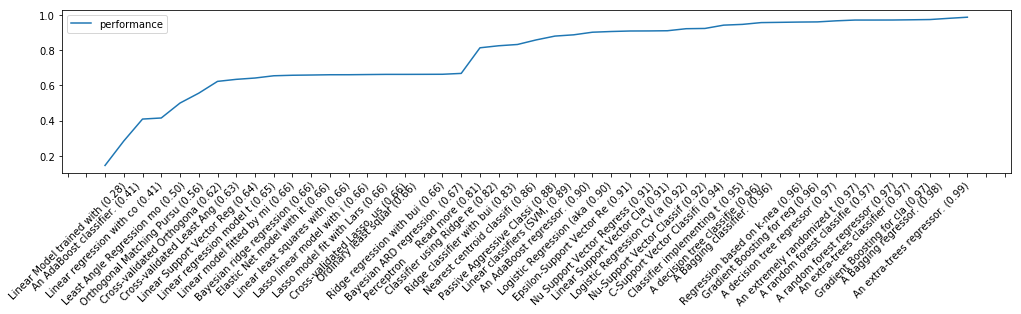

In [45]:
fig , axes = plt.subplots(1,1)
fig.set_size_inches(17,3)
df_perf = df_perf.sort_values(col_name )
df_perf.plot(rot=45, ax=axes)
axes.xaxis.set_ticklabels(df_perf.index)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))



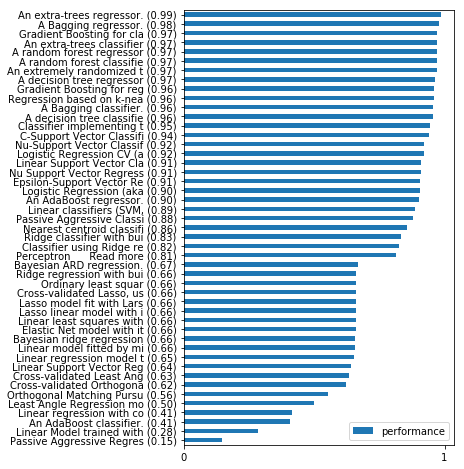

In [40]:
new_labels = []
for i, index in enumerate(df_perf.index):
    new_label = "%s (%.2f)"%(index,df_perf.performance[i])
    new_labels.append(new_label.replace("\n", " "))
    
fig , axes = plt.subplots(1,1)
df_perf.index = new_labels
fig.set_size_inches(15,8)
fig.subplots_adjust(left=0.65)
df_perf.sort_values(col_name).plot(kind='barh', ax=axes)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))

pass

In [ ]:
#On peut donc voir les scores obtenus par tout les algorithmes testés, et celui obtenant le meilleur
#score est donc "Extra Trees Regressor Algorithm" avec un score de 0.99